In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv('Customer Churn.csv')

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replacing blanks with 0's as tenure is 0 and no total charges are recorded

In [12]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
df["customerID"].duplicated().sum()

0

In [17]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

#Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand


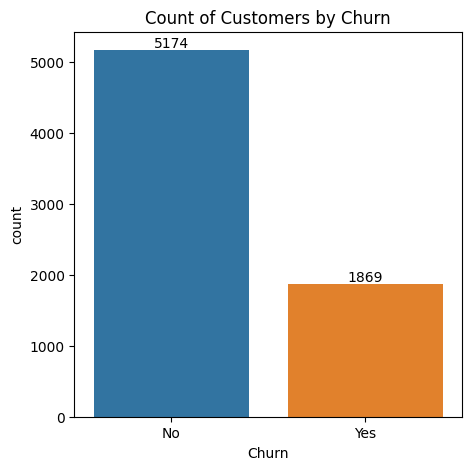

In [43]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Churn', data=df)

# Add count labels on the bars
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
# Display the plot
plt.show()

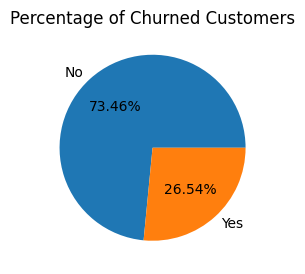

,Churn
Churn,
No,5174
Yes,1869


In [33]:
plt.figure(figsize = (3,4))
# Grouping by 'Churn' and counting occurrences
gb = df.groupby('Churn').agg({'Churn': 'count'})
plt.title("Percentage of Churned Customers")
# Creating a pie chart
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%')
plt.show()

# Displaying the grouped DataFrame
gb

#form the given pie chart we can conclude that 26.54% of our customers have churned out #not let's explore the reason behind it

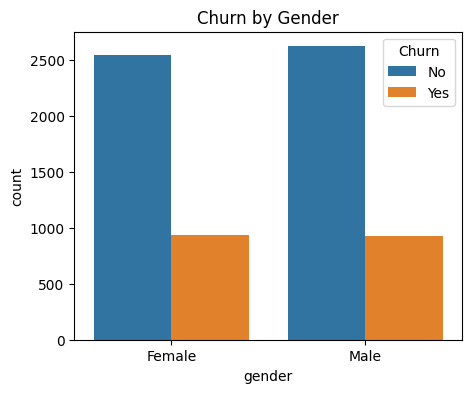

In [46]:
plt.figure(figsize=(5,4))
sns.countplot(x=df['gender'],data = df,hue = 'Churn')
plt.title('Churn by Gender')
plt.show()

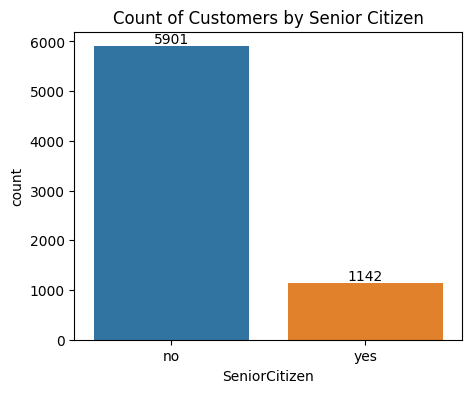

In [63]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df['SeniorCitizen'],data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Senior Citizen')
plt.show()

<Figure size 500x300 with 0 Axes>

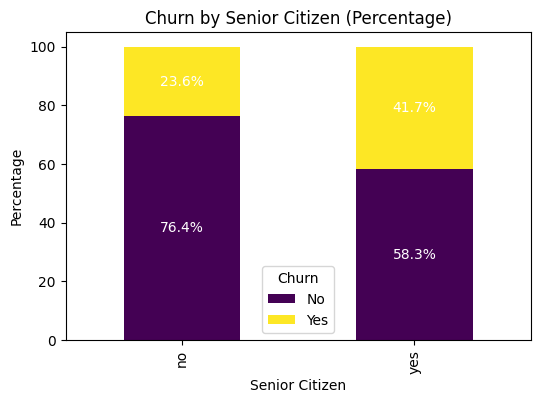

In [60]:
plt.figure(figsize=(5,3))
stacked_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()  # Create a cross-tab
stacked_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100  # Convert counts to percentages

# Plotting
stacked_percentage.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='viridis')

# Add labels
for i, bars in enumerate(stacked_percentage.iterrows()):
    for j, percentage in enumerate(bars[1]):
        plt.text(i, sum(bars[1][:j + 1]) - (percentage / 2), f"{percentage:.1f}%", 
                 ha='center', va='center', color='white', fontsize=10)

# Titles and labels
plt.title('Churn by Senior Citizen (Percentage)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.legend(title='Churn')
plt.show()

#comparative a greated percentage of people in senior citizen category have churned

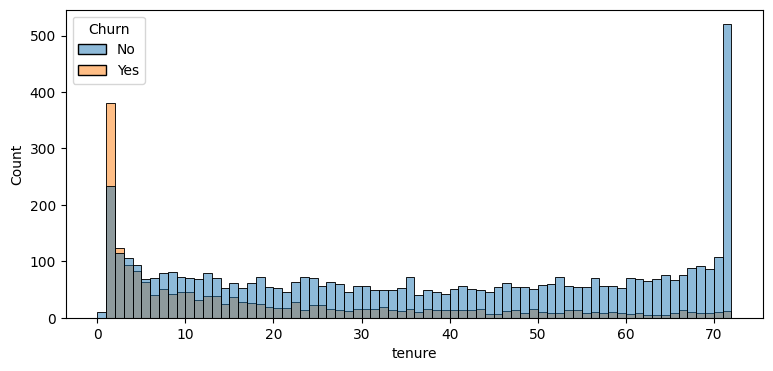

In [59]:
plt.figure(figsize=(9,4))
sns.histplot(x ='tenure', data = df  ,bins = 72,hue = 'Churn')
plt.show()

#prople who have used our services for a long time have stayed and people who have used our services #1 or 2 months have churned

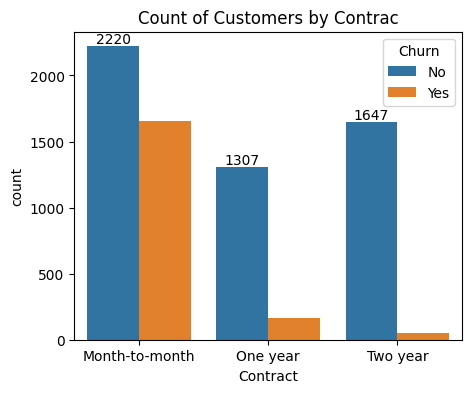

In [65]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x=df['Contract'],data = df,hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Contract')
plt.show()

#people who have month contract are likely to churn than form those who have 1 or 2 years of contract

In [67]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

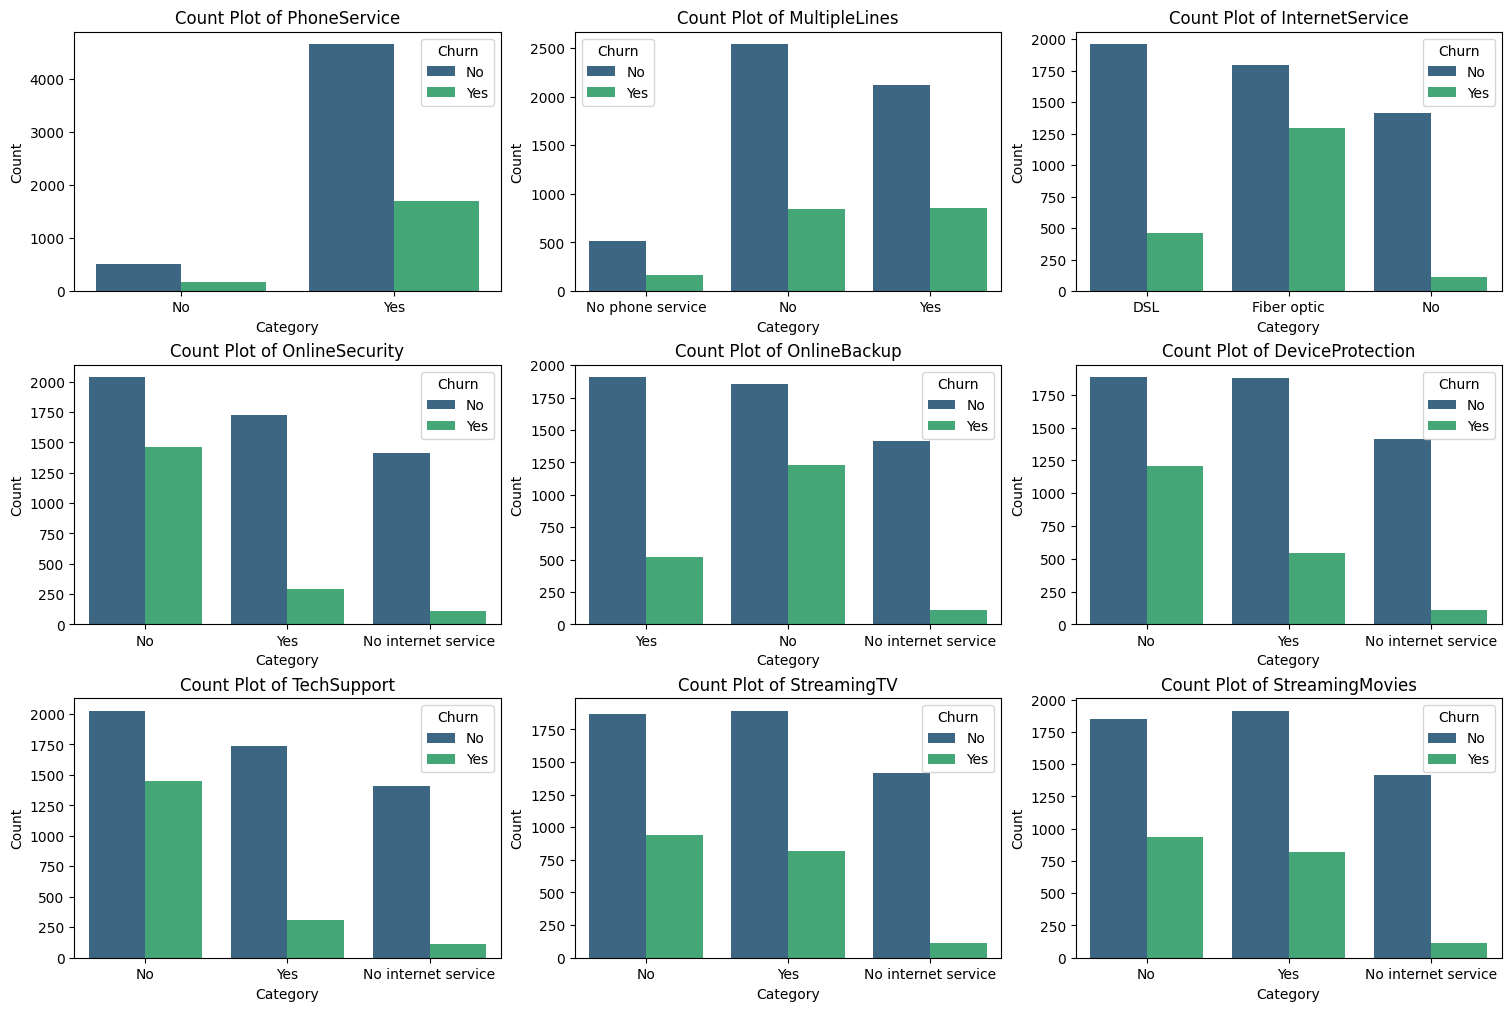

In [69]:
# List of columns to plot
columns_to_plot = ['PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
num_cols = 3  # Number of columns per row in subplots
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols  # Calculate required rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10), constrained_layout=True)

# Flatten axes array to loop through
axes = axes.flatten()

# Loop through columns and create count plots
for i, col in enumerate(columns_to_plot):
    sns.countplot(data=df, x=col, ax=axes[i], palette='viridis',hue = 'Churn')
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('Category')

# Remove unused subplots if columns < total axes
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Show the plots
plt.show()

#The visualizations show the distribution of churn across multiple service categories like PhoneService, InternetService, and others. For most services, customers with "No" churn out less frequently than those with "Yes." Additionally, services like Fiber Optic and lack of TechSupport seem to correlate with higher churn rates.

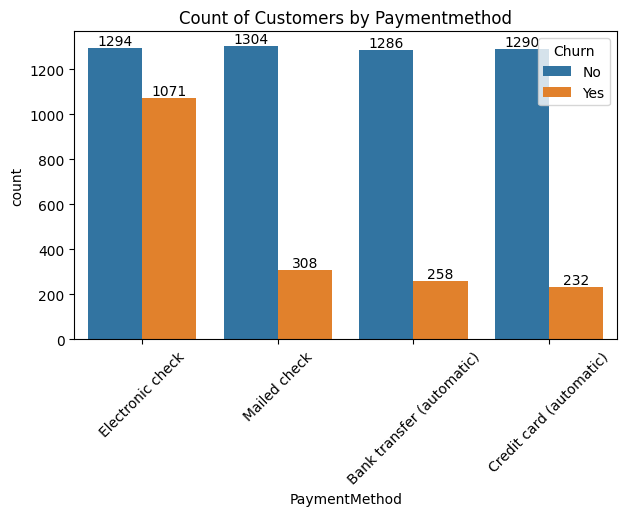

In [74]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x=df['PaymentMethod'],data = df,hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.title('Count of Customers by Paymentmethod')
plt.show()

#customer is likely to churn when he is using electronic check as a payment method